In [53]:
import pandas as pd
classifications = pd.read_csv("../NCBI_9606_DGIDB_MSIGDB_genes_ONLY.csv")
importance_scores = pd.read_csv("./DATA/importance_scores_Unidirectional_bipolar_NEW.tsv", sep="\t")
importance_name = "Unidirectional Bipolar"

In [54]:
merged_df = importance_scores.merge(
    classifications[['Symbol', 'Predicted_Category']],
    left_on='claim_name',
    right_on='Symbol',
    how='left'
)
merged_df = merged_df.drop(columns=['Symbol'])
merged_df.head()

,index,score,claim_name,ncbi_gene_id,Predicted_Category
0,17056,0.023415,SRC,6714,Cancer
1,17461,0.021858,TNF,7124,Cancer
2,17490,0.017392,TP53,7157,Cancer
3,4555,0.013329,CYP1A1,1543,Cell Cycle Regulation
4,5636,0.013108,ALDH1A1,216,Metabolism


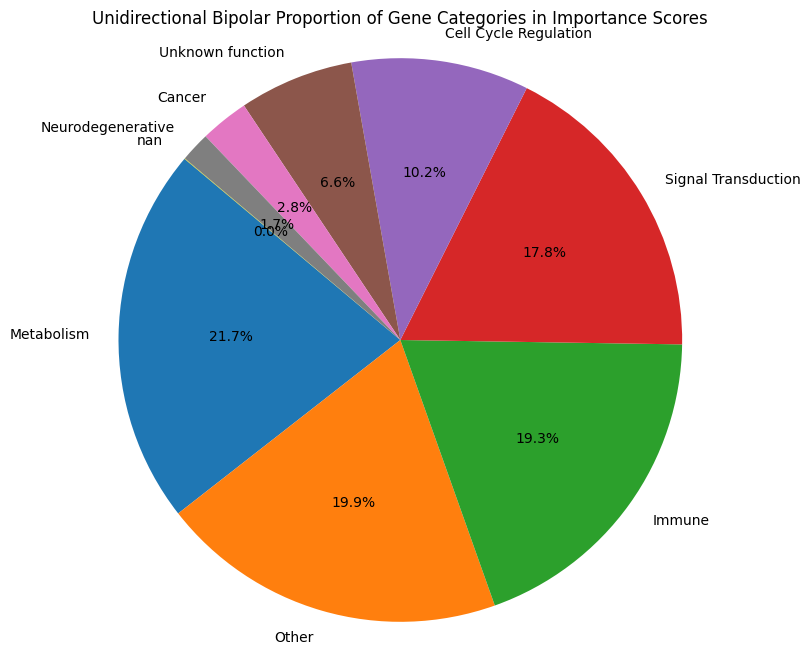

In [55]:
import matplotlib.pyplot as plt

# Count the number of genes in each category
category_counts = merged_df['Predicted_Category'].value_counts(dropna=False)  # include NaNs if any
category_percent = category_counts / category_counts.sum() * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_percent, labels=category_percent.index, autopct='%1.1f%%', startangle=140)
plt.title(importance_name + ' Proportion of Gene Categories in Importance Scores')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


C:\Users\richa\AppData\Local\Temp\ipykernel_41608\4209714959.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = merged_df.groupby(['score_bin', 'Predicted_Category']).size().unstack(fill_value=0)


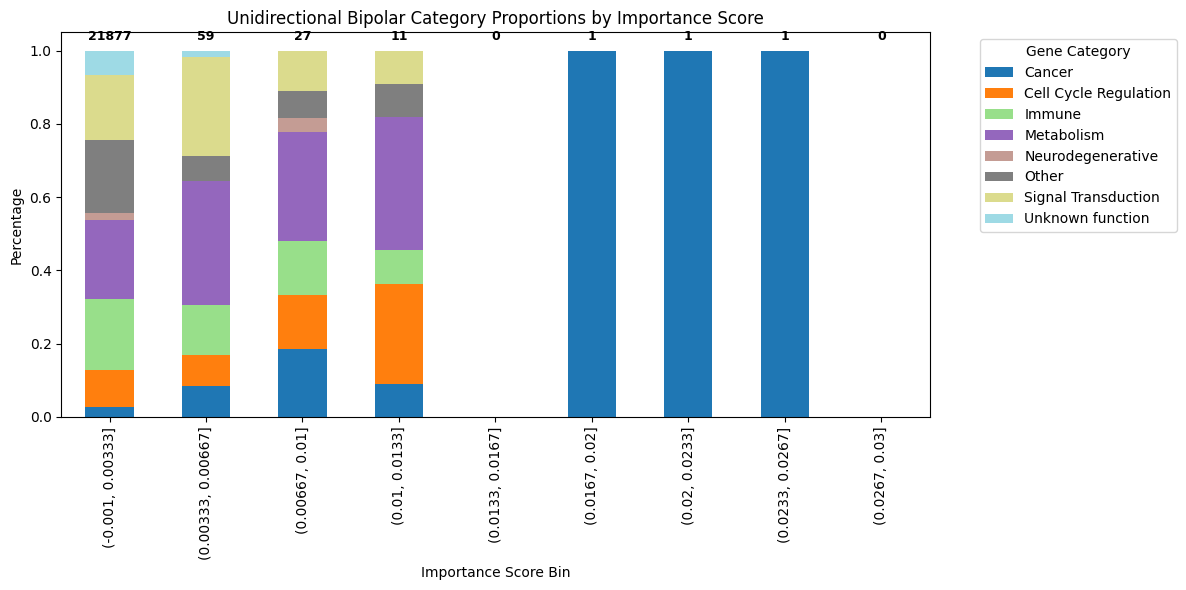

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Bin the scores
bins = np.linspace(0, 0.03, 10)
merged_df['score_bin'] = pd.cut(merged_df['score'], bins=bins, include_lowest=True)

# Count number of each category in each bin
binned = merged_df.groupby(['score_bin', 'Predicted_Category']).size().unstack(fill_value=0)

# Get total counts for annotation
bin_totals = binned.sum(axis=1)

# Normalize to percentages for plotting
binned_percent = binned.div(bin_totals, axis=0)

# Plot
ax = binned_percent.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    figsize=(12, 6)
)

# Annotate each bar with the total count
for idx, total in enumerate(bin_totals):
    ax.text(
        idx, 1.02, str(total),  # x-position, y-position (slightly above the bar), text
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )

plt.ylabel('Percentage')
plt.xlabel('Importance Score Bin')
plt.title(importance_name + ' Category Proportions by Importance Score')
plt.legend(title='Gene Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
